In [703]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [704]:
G = nx.Graph()
G.clear()

In [705]:
def get_infected_nodes():
    infected_nodes = [x for x,y in G.nodes(data=True) if y['state']==1]
    return infected_nodes
def get_recovered_nodes():
    recovered_nodes = [x for x,y in G.nodes(data=True) if y['state']==2]
    return recovered_nodes
def get_susceptible_nodes():
    susceptible_nodes = [x for x,y in G.nodes(data=True) if y['state']==0]
    return susceptible_nodes

In [706]:
def print_stats():
    r0 = round(((alpha*avg_deg)/mu), 2)
    print("R0: ", r0)
    print("Peak cases: ", max(epi_curve_data))
    print("Peak time period: ", epi_curve_data.index(max(epi_curve_data)))
    print("Total time periods: ", num_periods)        
    print("Average contacts: ", round(avg_deg, 0))
    print("Healthy left: ", len(get_susceptible_nodes()))

In [707]:
def spread_virus():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.random() <= alpha):
                        #print("neib: "+str(j))
                        G.nodes[j]['state']=1
                        #print("state: "+ str(G.nodes[j]['state']))
            if (np.random.random() <= mu):
                G.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        #print(infected_nodes_list)
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [708]:
def init_conditions():
    state = 0
    nx.set_node_attributes(G, state, "state")
    G.nodes[6]['state'] = 1
    #G.nodes[3]['state'] = 1
    #.nodes[2]['state'] = 1

In [709]:
def generate_epidemic_graph():
  fig = plt.figure(figsize=(15, 6))
  ax = plt.axes()
  plt.xlabel('xlabel', fontsize=16)
  plt.ylabel('ylabel', fontsize=16)
  #ax.set_yscale('log')
  plt.stackplot(x,epi_curve_data, sup_curve_data, rec_curve_data, labels=['Infected','Suspectible','Recovered'], colors=['BB641D','AAC6CA','BC8AC0'])
  ax.set(xlabel='Time', ylabel='Number of People')
  if(Super_spreaders==False):
    fig.suptitle('infectiousness = '+str(infectiousness) + ' recovery speed = '+str(recovery_speed) + ' connectivity (ER model) = '+str(connectivity) , fontsize=20)
  else:
    fig.suptitle('infectiousness = '+str(infectiousness) + ' recovery = '+str(recovery_speed) + ' super_spread_connectivity = '+str(super_spread_connectivity), fontsize=20)
  plt.legend()

In [710]:
G = nx.Graph()
G.clear()
number_people =1000
p =.01
G = nx.erdos_renyi_graph(number_people, p)

In [711]:
mu = .1
alpha = .2

In [712]:
# Enter values for the follow parameters

# **Enter values for the follow parameters in the form below:**

---



In [713]:
infectiousness = 0.2 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

In [714]:
recovery_speed = 0.6 #@param {type:"slider", min:0.1, max:0.9, step:0.1}


In [715]:
Super_spreaders = True #@param ["False", "True"] {type:"raw"}

In [716]:
connectivity = 0.001 #@param {type:"slider", min:0.001, max:0.009, step:0.001}


In [717]:
super_spread_connectivity = 7 #@param {type:"slider", min:5, max:10, step:1}

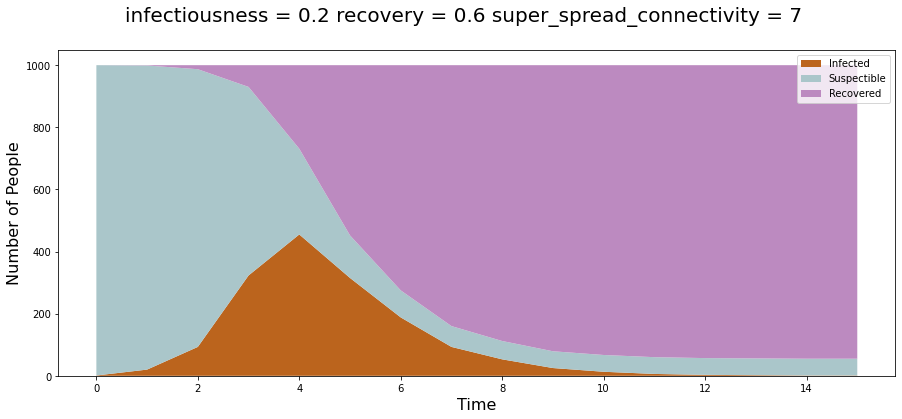

In [718]:
alpha = infectiousness
mu = recovery_speed
#Super_spreaders=True
connectivity=p
if(Super_spreaders==True):
  m = super_spread_connectivity
  G = nx.barabasi_albert_graph(number_people, m)
else:
  if(p!=connectivity):
    G = nx.erdos_renyi_graph(number_people, connectivity)
    p = connectivity
init_conditions()
degrees = [val for (node, val) in G.degree()]
avg_deg = G.number_of_edges()/number_people
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
x = list(range(0, len(epi_curve_data)))
generate_epidemic_graph()

In [719]:
print_stats()

R0:  2.32
Peak cases:  455
Peak time period:  4
Total time periods:  16
Average contacts:  7.0
Healthy left:  54


In [720]:
#plt.figure(figsize=(12, 10))
#nx.draw(G, edge_color="#999999", node_size=500, node_color='#E2E2E2', with_labels = True)
#plt.title('Network Graph', size=18)
#plt.show()

In [721]:
#epi_curve_data

In [722]:
#rec_curve_data

In [723]:
#sup_curve_data

In [724]:
#Super_spreaders = True #@param ["False", "True"] {type:"raw"}

In [725]:
#connectivity = 0.001 #@param {type:"slider", min:0.001, max:0.009, step:0.001}